## NOTES { spatial variation in polygon vs raster soil map; multi-2D maps as ISRIC/World DSM; integrated 3-D maps==>spatial occurrence of soil horizons}

## Seminario :: Analisi statistica spaziale di alcune proprietà dei suoli

### Laurea magistrale in scienze forestali ed ambientali
### corso di Geografia e Valutazione del suolo

##### Andicità:

$$Andicità = Al_{ossalato} + \frac{1}{2} Fe_{ossalato}$$

##### Requirements:

In [18]:
#_________________
#
# P A C K A G E S
#_________________
require("ggplot2")
require("gridExtra")
require(dismo)
library("gstat")
#ibrary("sp")
#library("methods")
#library("geoR")
#library("raster")
#library(plyr)

# to be included:
#require("soilprofile")

##### Import data (Biosoil Proj):

In [2]:
D<-read.table(file="D_cl-o-r_corr.txt",header = T, sep=",")

##### Sommario dei dati:

In [3]:
names(D)

[1] "depth"          "Stmax"          "Stavg"          "EndP"          
 [5] "MaxP"           "MaxV"           "RanV"           "RtUp"          
 [9] "RtDn"           "TINDVI"         "Easting_32632"  "Northing_32632"
[13] "elev"           "asp"            "slo"            "tri"           
[17] "Al05Fe"

In [23]:
summary(D[,c(1,17,13,14,15)])

     depth            Al05Fe             elev             asp        
 Min.   :0.0450   Min.   :0.02244   Min.   :   6.0   Min.   :  0.00  
 1st Qu.:0.0500   1st Qu.:0.17428   1st Qu.: 505.5   1st Qu.: 53.35  
 Median :0.1500   Median :0.32569   Median : 819.0   Median :148.39  
 Mean   :0.2329   Mean   :0.51684   Mean   : 894.7   Mean   :161.90  
 3rd Qu.:0.3000   3rd Qu.:0.55783   3rd Qu.:1215.5   3rd Qu.:262.41  
 Max.   :0.7000   Max.   :4.61270   Max.   :2500.0   Max.   :359.44  
      slo        
 Min.   :  0.00  
 1st Qu.: 21.36  
 Median : 36.39  
 Mean   : 39.67  
 3rd Qu.: 53.40  
 Max.   :113.58  

In [5]:
#cor( D[,c(17,1,11:16)] ) # , na.rm = TRUE
cor( D[,17],D[,c(1,11:16)] ) # , na.rm = TRUE

depth,Easting_32632,Northing_32632,elev,asp,slo,tri
0.03820968,0.2891981,-0.1817987,0.2453216,-0.1150911,0.1537471,0.1311544


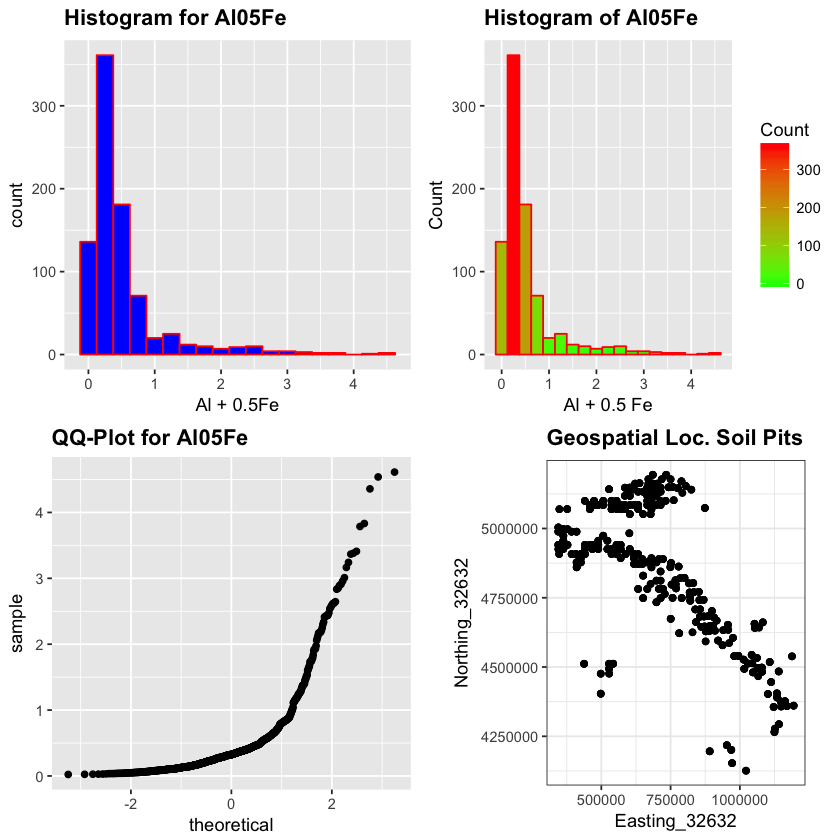

In [6]:
plt0 <- qplot(D$Al05Fe,geom="histogram",binwidth = 0.25,main = "Histogram for Al05Fe",fill=I("blue"),col=I("red"),xlab = "Al + 0.5Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt1 <- ggplot(data=D,aes(D$Al05Fe)) + geom_histogram(binwidth = 0.25,col="red",aes(fill=..count..)) + scale_fill_gradient("Count", low = "green", high = "red") + ggtitle("Histogram of Al05Fe") + theme(plot.title = element_text(lineheight=.8, face="bold")) + labs(x="Al + 0.5 Fe", y="Count")
plt2 <- qplot(Easting_32632, Northing_32632, data=D) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Geospatial Loc. Soil Pits") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt3 <- ggplot(D, aes(sample=Al05Fe))+stat_qq() + ggtitle("QQ-Plot for Al05Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
grid.arrange(plt0,plt1,plt3,plt2,ncol=2,nrow=2)

##### Plot Andicity by depth: [Note: add a soil profile ID]

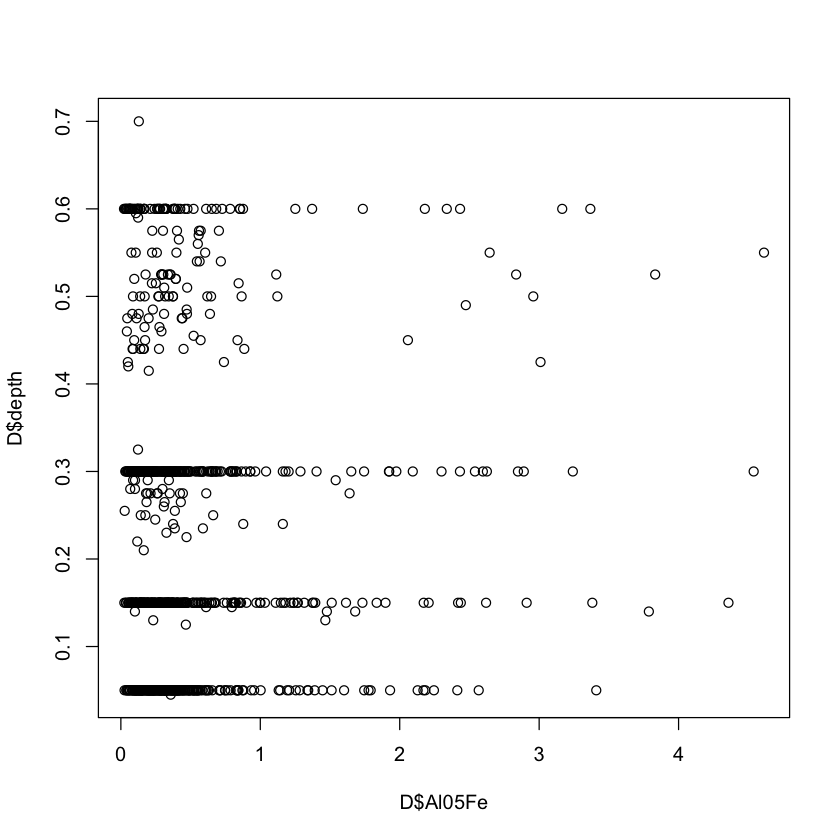

In [7]:
#prof.D <- build.profile(D)
#eplot(prof.D,  Corg , col= black , type= b , main= Example, xlab= Organic C (percent) , ylab= Depth )
plot(D$Al05Fe,D$depth)

#library(plyr)
#pp<-ddply( D,.(depth),summarize, Andicity = round(mean(Al05Fe),2) )

#require(matplot)
#dat <- matrix(runif(40,1,20),ncol=4) # make data
#matplot(dat, type = c("b"),pch=1,col = 1:4) #plot
#legend("topleft", legend = 1:4, col=1:4, pch=1) # optional legend

##### Visualizzazione dei punti di campionamento:

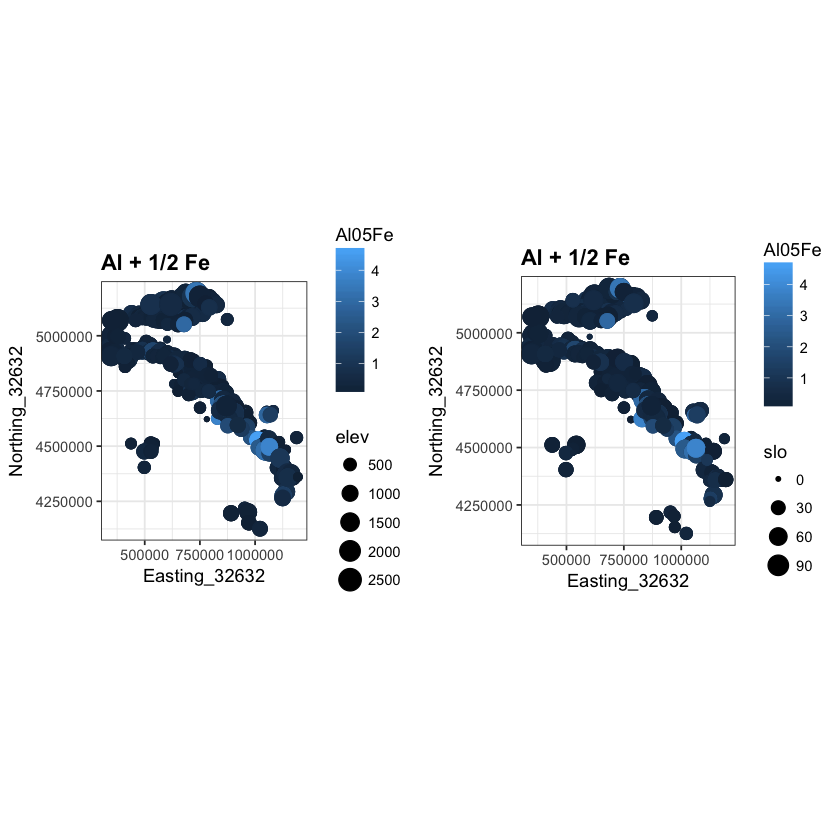

In [21]:
plt1 <- qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=elev) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Al + 1/2 Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt2 <- qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=slo) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Al + 1/2 Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,ncol=2,nrow=1)
#qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=elev) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Effect of elevation on (Al + 1/2 Fe)") + theme(plot.title = element_text(lineheight=.8, face="bold"))
#qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=slo ) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Effect of slope on (Al + 1/2 Fe)") + theme(plot.title = element_text(lineheight=.8, face="bold"))

##### Geospatial location of soil pits (Biosoil Proj):

Loading required package: dismo
Loading required package: raster
Loading required package: sp


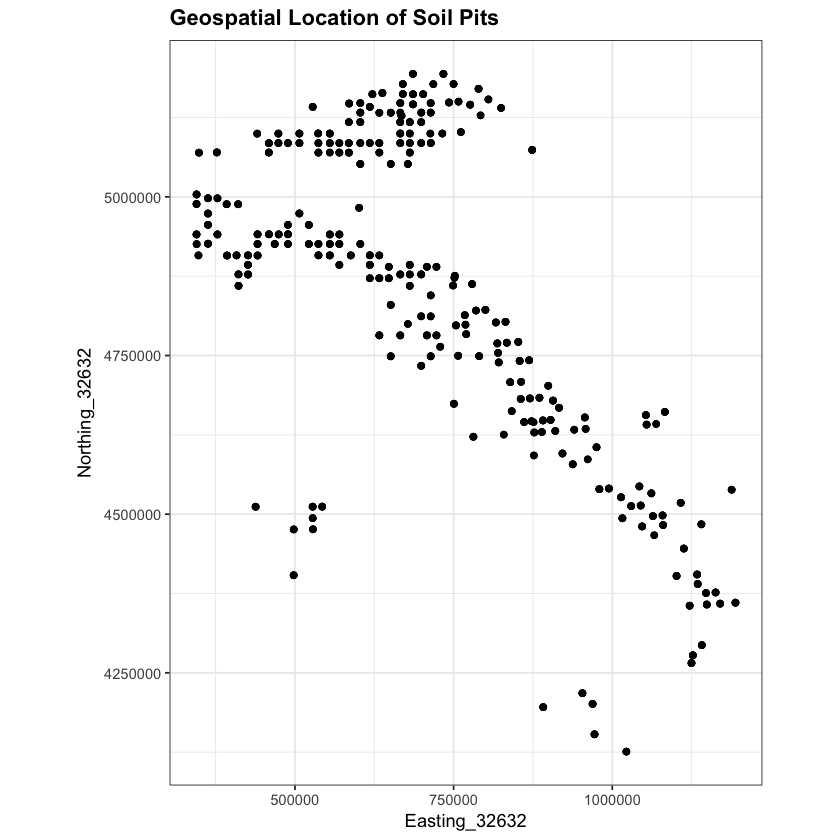

In [10]:
# see
#  http://stackoverflow.com/questions/41787313/how-to-create-a-grid-of-spatial-points
#  https://pakillo.github.io/R-GIS-tutorial/
it <- getData('GADM', country = 'IT', level = 1)
campania <- it[it$NAME_1 == "Campania",]
qplot(Easting_32632, Northing_32632, data=D) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Geospatial Location of Soil Pits") + theme(plot.title = element_text(lineheight=.8, face="bold"))

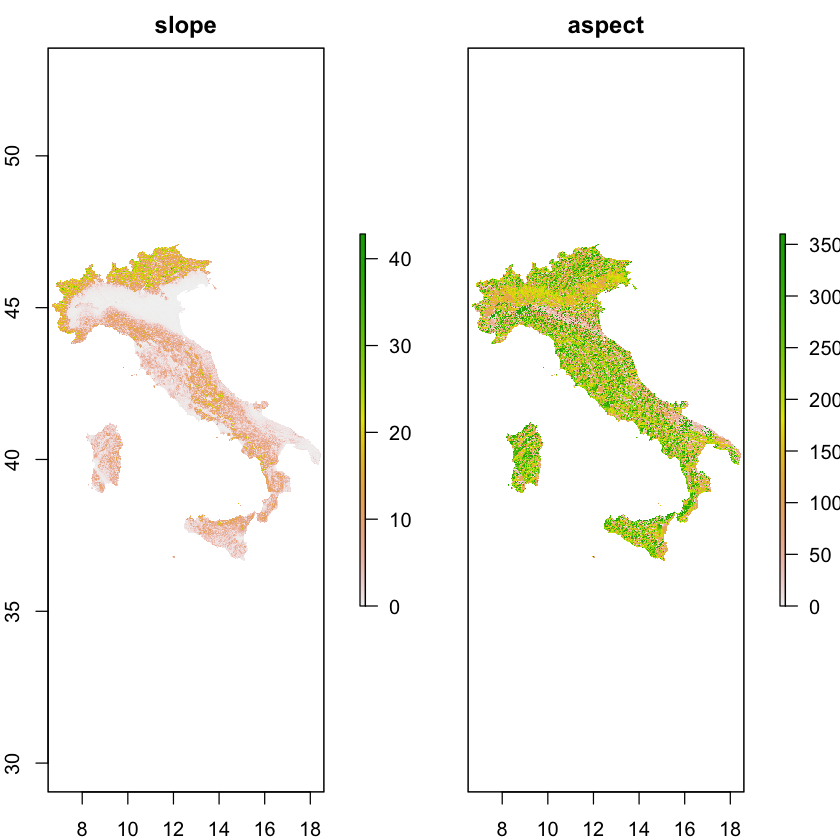

In [11]:
elevation <- getData("alt", country = "IT")
# Some quick maps:
x <- terrain(elevation, opt = c("slope", "aspect"), unit = "degrees")
plot(x)

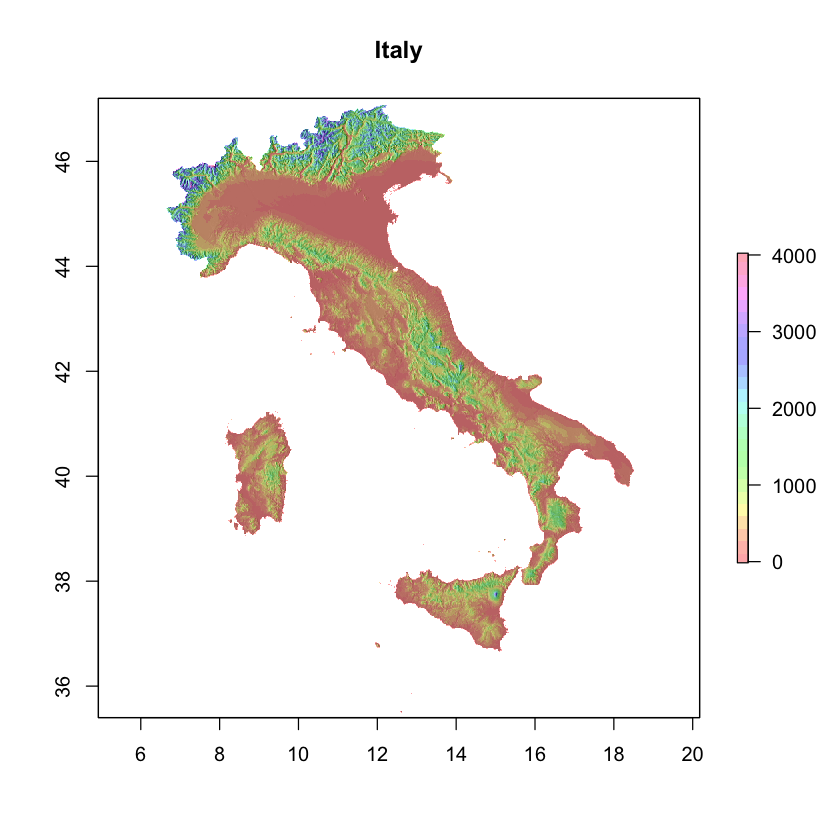

In [24]:
slope <- terrain(elevation, opt = "slope")
aspect <- terrain(elevation, opt = "aspect")
hill <- hillShade(slope, aspect, 40, 270)
plot(hill, col = grey(0:100/100), legend = FALSE, main = "Italy")
plot(elevation, col = rainbow(25, alpha = 0.35), add = TRUE)
# to add points I have to set a ref system and change it equal to hill!
#plot(D$Easting_32632, D$Northing_32632, add = TRUE)

In [26]:
# data
Ds <- D
coordinates(Ds) = ~Easting_32632+Northing_32632

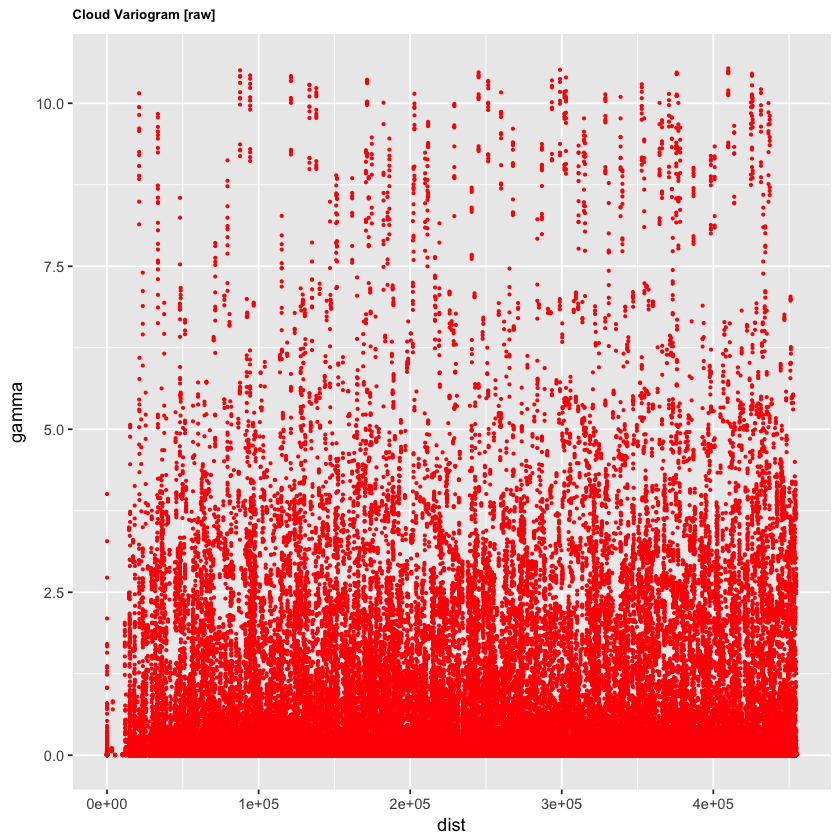

In [29]:
vgm.exp.raw.cloud = variogram( Al05Fe~1, Ds, cloud=TRUE )
ggplot(data=vgm.exp.raw.cloud,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Cloud Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))

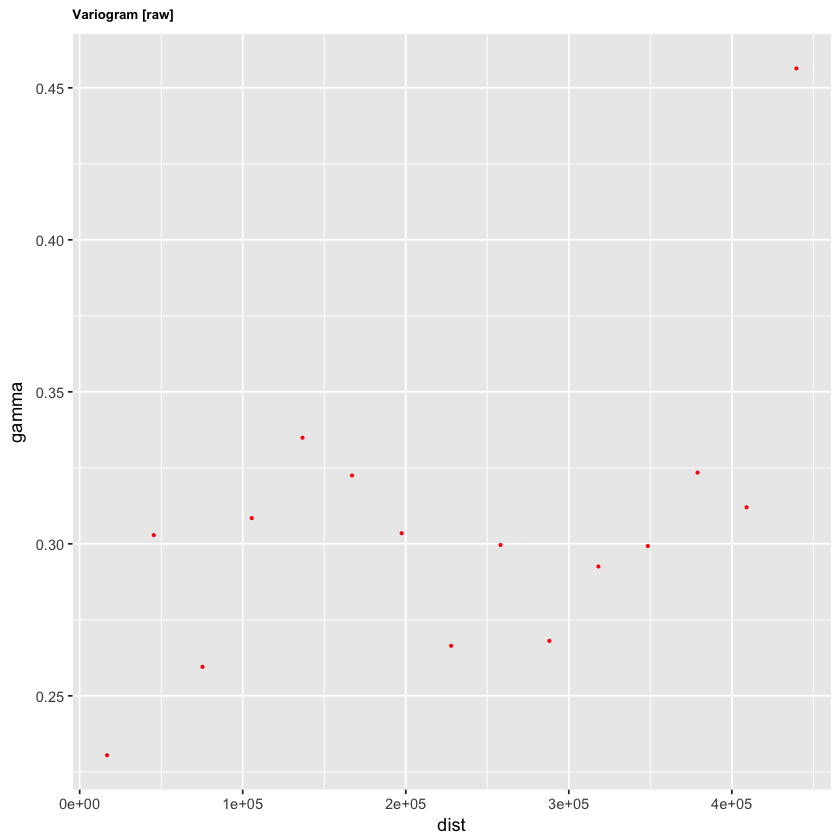

In [30]:
vgm.exp.raw = variogram( Al05Fe~1, Ds )
ggplot(data=vgm.exp.raw,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))

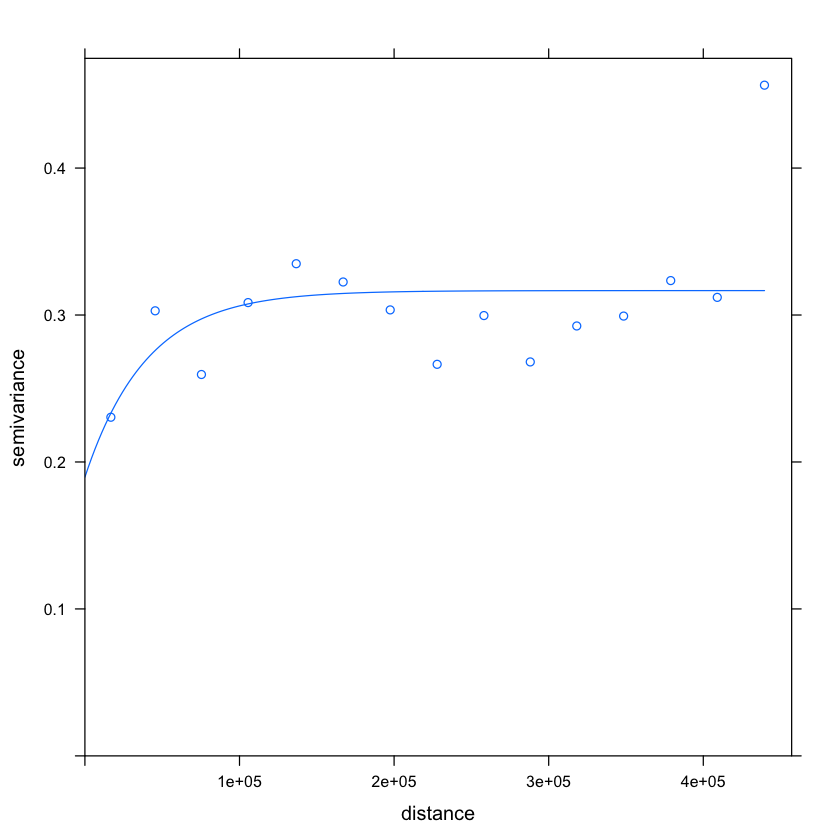

In [42]:
psill 	= 0.27
range 	= 0.4e+05
nugget 	= 0.05
vgm.fit.raw = fit.variogram( vgm.exp.raw, model=vgm(psill,'Exp',range,nugget), fit.sills = TRUE,
                             fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plot(vgm.exp.raw,vgm.fit.raw)

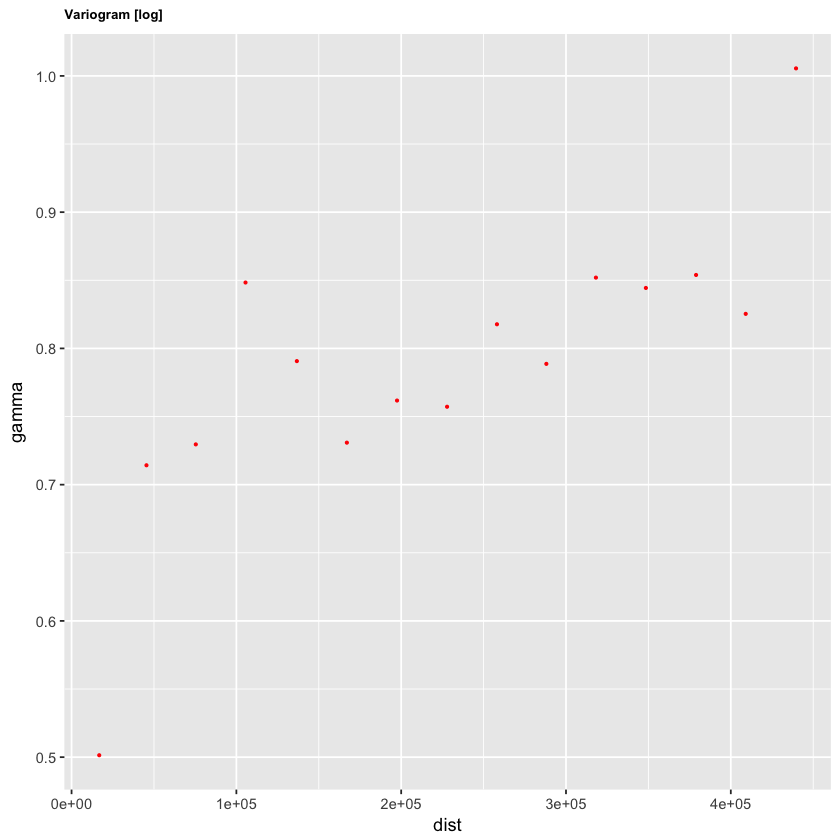

In [43]:
vgm.exp.log = variogram( log(Al05Fe)~1, Ds )
ggplot(data=vgm.exp.log,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Variogram [log]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))

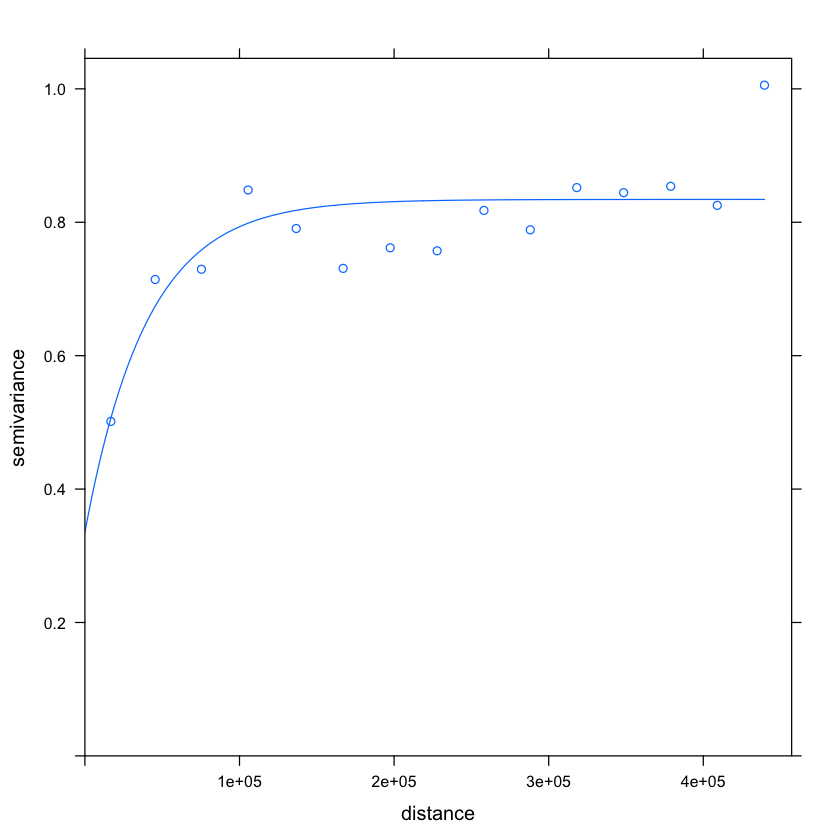

In [44]:
psill 	= 0.27
range 	= 0.4e+05
nugget 	= 0.05
vgm.fit.log = fit.variogram( vgm.exp.log, model=vgm(psill,'Exp',range,nugget), fit.sills = TRUE,
                             fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plot(vgm.exp.log,vgm.fit.log)

In [45]:
class(elevation)
elevation

[1] "RasterLayer"
attr(,"package")
[1] "raster"

class       : RasterLayer 
dimensions  : 1416, 1452, 2056032  (nrow, ncol, ncell)
resolution  : 0.008333333, 0.008333333  (x, y)
extent      : 6.5, 18.6, 35.4, 47.2  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : /Users/giuliano/git/seminars/GeogrValutSuolo/ITA_msk_alt.grd 
names       : ITA_msk_alt 
values      : -69, 4280  (min, max)


In [52]:
require(rgdal)
el_32632 <- spTransform(elevation, CRS("+init=epsg:32632"))

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘spTransform’ for signature ‘"RasterLayer", "CRS"’


In [ ]:
grd <- as(el_32632, 'SpatialGridDataFrame')
gridded(grd) = TRUE

In [47]:
krg.ok.raw = krige(Al05Fe~1, Ds, grd, model = vgm.fit.raw, nmax=40, nmin=7)#, maxdist=350)

ERROR: Error in predict.gstat(g, newdata = newdata, block = block, nsim = nsim, : var1 : data item in gstat object and newdata have different coordinate reference systems


In [48]:
grd

Object of class SpatialGridDataFrame
Object of class SpatialGrid
Grid topology:
   cellcentre.offset    cellsize cells.dim
s1          6.504167 0.008333333      1452
s2         35.404167 0.008333333      1416
SpatialPoints:
                  s1       s2
      [1,]  6.504167 47.19583
      [2,]  6.512500 47.19583
      [3,]  6.520833 47.19583
      [4,]  6.529167 47.19583
      [5,]  6.537500 47.19583
      [6,]  6.545833 47.19583
      [7,]  6.554167 47.19583
      [8,]  6.562500 47.19583
      [9,]  6.570833 47.19583
     [10,]  6.579167 47.19583
     [11,]  6.587500 47.19583
     [12,]  6.595833 47.19583
     [13,]  6.604167 47.19583
     [14,]  6.612500 47.19583
     [15,]  6.620833 47.19583
     [16,]  6.629167 47.19583
     [17,]  6.637500 47.19583
     [18,]  6.645833 47.19583
     [19,]  6.654167 47.19583
     [20,]  6.662500 47.19583
     [21,]  6.670833 47.19583
     [22,]  6.679167 47.19583
     [23,]  6.687500 47.19583
     [24,]  6.695833 47.19583
     [25,]  6.704167 47.19

In [51]:
??spTransform